<a href="https://colab.research.google.com/github/yashasangani/DeepLearning-6th-July/blob/main/Binary_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

Step 1: Read the Dataset

In [2]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/yashasangani/Datasets/main/booking_train.csv'
df = pd.read_csv(url1)

In [3]:
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Step 2 : Perform vasic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [5]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Step 3 : Seperate X and Y (booking_status)
id is stastically insignificant

In [7]:
X = df.drop(columns=['id','booking_status'])
Y = df[['booking_status']]
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


### Step 4 : Perform preprocessing on X

In [9]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [11]:
num_pipe = Pipeline(steps = [('impute',SimpleImputer(strategy = 'median')),
                             ('scaler', StandardScaler())]).set_output(transform = 'pandas')


In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


## Step : 5 Train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [14]:
X_train.shape

(33680, 17)

In [15]:
Y_train.shape

(33680, 1)

In [16]:
X_test.shape

(8420, 17)

## Building Neuron Network
Dropout layer - Randomly drop some % of neuron links




In [17]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout

In [18]:
# Initialize the model
model = Sequential()

# Add the input layer and the first hidden layer

model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer 1
model.add(Dense(64 , activation='relu'))
# add Dropout layer 1
model.add(Dropout(0.4))

# Hidden layer 2
model.add(Dense(32, activation='relu'))
# add Dropout layer 2
model.add(Dropout(0.3))

# Add Outer layer
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [20]:
hist = model.fit(X_train, Y_train, epochs=60, validation_split=0.2)

Epoch 1/60
842/842 [==============================] - 13s 7ms/step - loss: 0.5297 - accuracy: 0.7332 - val_loss: 0.4831 - val_accuracy: 0.7703
Epoch 2/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4872 - accuracy: 0.7687 - val_loss: 0.4767 - val_accuracy: 0.7757
Epoch 3/60
842/842 [==============================] - 4s 4ms/step - loss: 0.4771 - accuracy: 0.7767 - val_loss: 0.4730 - val_accuracy: 0.7797
Epoch 4/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4750 - accuracy: 0.7801 - val_loss: 0.4718 - val_accuracy: 0.7813
Epoch 5/60
842/842 [==============================] - 3s 3ms/step - loss: 0.4700 - accuracy: 0.7823 - val_loss: 0.4691 - val_accuracy: 0.7847
Epoch 6/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4669 - accuracy: 0.7835 - val_loss: 0.4670 - val_accuracy: 0.7864
Epoch 7/60
842/842 [==============================] - 4s 4ms/step - loss: 0.4658 - accuracy: 0.7855 - val_loss: 0.4633 - val_accuracy: 0.7889
Epoch

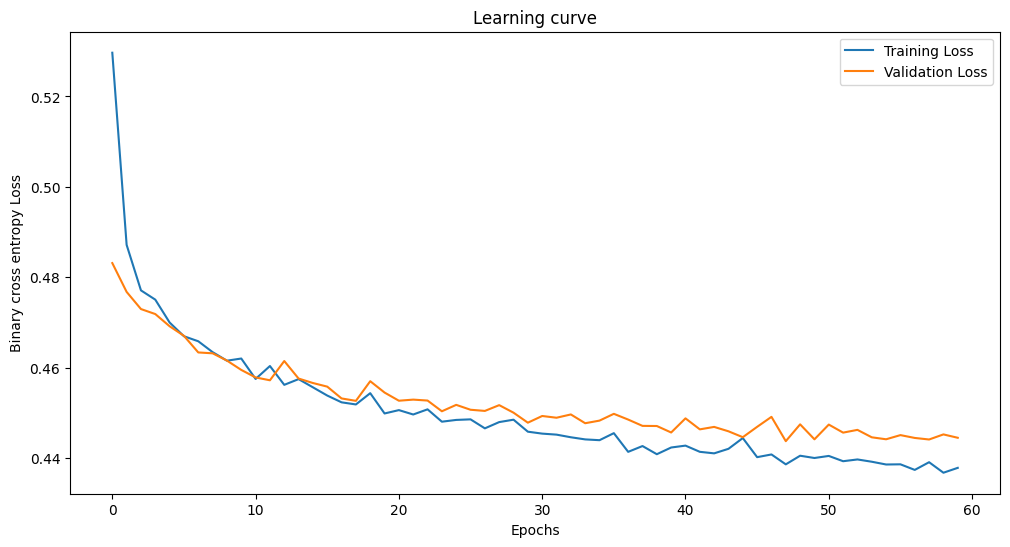

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label = 'Training Loss')
plt.plot(hist.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary cross entropy Loss')
plt.title('Learning curve')
plt.legend()
plt.show()

In [22]:
model.evaluate(X_train,Y_train)

1053/1053 [==============================] - 2s 2ms/step - loss: 0.4220 - accuracy: 0.8102


[0.42195484042167664, 0.8102138042449951]

In [23]:
model.evaluate(X_test,Y_test)

264/264 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8049


[0.4299989342689514, 0.8048693537712097]

## Get predictions on train and test

In [43]:
yprob_train = model.predict(X_train)
yprob_test = model.predict(X_test)

264/264 [==============================] - 0s 2ms/step


In [44]:
yprob_train[0:5]

array([[0.00711156],
       [0.16748913],
       [0.76001865],
       [0.7760465 ],
       [0.7998349 ]], dtype=float32)

In [45]:
Y_train.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [46]:
ypred_train = [1 if prob >=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob >=0.5 else 0 for prob in yprob_test]

In [47]:
ypred_train[0:5]

[0, 0, 1, 1, 1]

In [48]:
Y_test.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [49]:
ypred_test[0:5]

[0, 1, 1, 0, 0]

In [50]:
yprob_test[0:5]

array([[0.03506632],
       [0.8642112 ],
       [0.5882328 ],
       [0.01653108],
       [0.22193405]], dtype=float32)

### Confusion Matrix

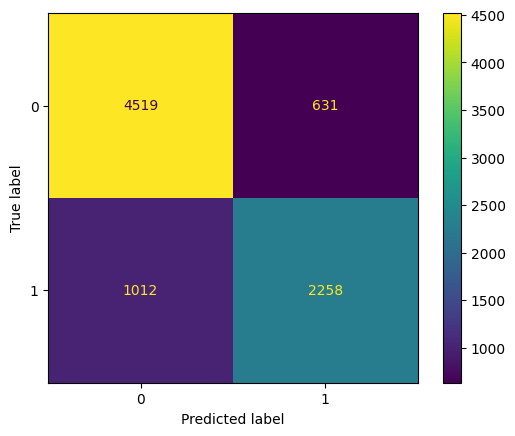

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,ypred_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5150
           1       0.78      0.69      0.73      3270

    accuracy                           0.80      8420
   macro avg       0.80      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



In [53]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,ypred_test)


0.7839978029155904

ROC_AUC score is more than 80% hence model is Good
## out of sample predictions

In [54]:
url2= "https://raw.githubusercontent.com/yashasangani/Datasets/main/booking_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [55]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [56]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [57]:
probs = model.predict(xnew2_pre)
probs[0:5]

878/878 [==============================] - 2s 2ms/step


array([[0.06426038],
       [0.03025821],
       [0.30060843],
       [0.19745034],
       [0.57006997]], dtype=float32)

In [58]:
preds = [1 if prob >=0.5 else 0 for prob in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [60]:
df_final = xnew[['id']]
df_final["booking_status"] = preds
df_final['probability'] = probs
df_final

,id,booking_status,probability
0,42100,0,0.064260
1,42101,0,0.030258
2,42102,0,0.300608
3,42103,0,0.197450
4,42104,1,0.570070
...,...,...,...
28063,70163,1,0.960994
28064,70164,0,0.054161
28065,70165,0,0.163897
28066,70166,0,0.380537


In [61]:
df_final['booking_status'].value_counts()

booking_status
0    18496
1     9572
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

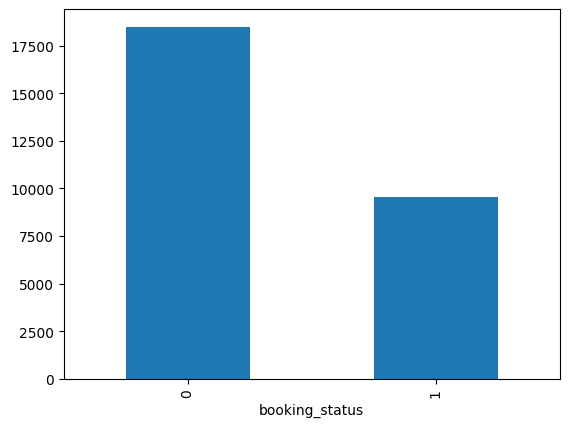

In [63]:
df_final['booking_status'].value_counts().plot(kind = 'bar')

In [64]:
df_final.to_csv('Results.csv',index = False)